# Cours 3: Outils de calcul élémentaires


## Introduction


Maintenant que nous commençons à maîtriser les éléments fondamentaux de Qiskit que sont les registres quantiques, les qubits, leurs équivalents classiques et quelques portes quantiques élémentaires, nous pouvons rentrer dans le vif du sujet. 

Dans le cadre de cette séance :

- nous reverrons la mesure pour pouvoir utiliser les résultats obtenus ;
- nous développerons des petits algorithmes quantiques.


### Nom et prénom


Commençons par inscrire votre nom et prénom en tant qu'objet string nom_prenom. Nous utiliserons comme convention :

- Un _ séparera le nom et le prénom.

Ainsi :
 
- Pour Jean-Pierre Pernault, nom_prenom = 'Pernault_Jean-Pierre'.

### Rappels :
- Si les fonctions *circuit.draw('mpl')* ne fonctionnent pas, il faut les remplacer par *circuit.draw()*
- Vous n'êtes pas notés sur l'affichage des circuits. Si dans le pire des cas vous n'arrivez pas à afficher les circuits, cela n'est pas un problème.
- Si les images du notebook ne s'affichent pas, vous pouvez toujours consulter le TP depuis le git. De manière générale, pour éviter le problème, je vous invite à télécharger le TP (ou le pull) depuis git, cela augmentera les chances que les images s'affichent correctement.
- Si les portes quantiques ne s'affichent pas dans le bon ordre, vous pouvez rajouter la fonction *circuit.barrier()* entre deux instructions au circuit (entre deux portes, entre une porte et une mesure, etc...) afin que le circuit s'affiche correctement (cela n'aura aucune influence sur la notation).

In [11]:
nom_prenom = "Votre nom"

import qiskit
from qiskit.circuit import QuantumRegister, Qubit, ClassicalRegister, Clbit, QuantumCircuit

## Méthodes et portes quantiques

Dans cette partie, nous apprendrons à implémenter et à écrire une méthode pour :

- la porte SWAP ;
- la transformée de Fourier quantique.

### Porte SWAP

La porte SWAP est une porte composée de trois CNOTs. Le circuit quantique associé est de la forme :

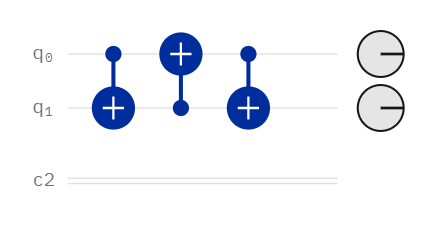

Commençons par le circuit quantique suivant *circ_swap* à deux qubits :

In [12]:
q_swap = QuantumRegister(2)
circ_swap = QuantumCircuit(q_swap)

circ_swap.x(q_swap[0])

C:\Users\Utilisateur\Anaconda\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


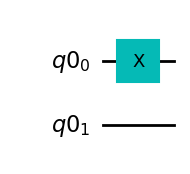

In [13]:
circ_swap.draw(output='mpl')

**1) Implémentez une porte SWAP directement sur** *circ_swap* **:**

In [ ]:
circ_swap.draw(output='mpl')

**2) Définissez une méthode** *porte_SWAP* **permettant de faire une porte SWAP ayant en entrée :**

- un circuit quantique ;
- un registre quantique de dimension deux ;

**et donnant en sortie le circuit quantique donné en entrée avec la porte SWAP implémentée.**

In [ ]:
def porte_SWAP(circuit, qubits):
    
    

In [ ]:
circ_swap = porte_SWAP(circ_swap, q_swap)
circ_swap.draw(output='mpl')

**3) Définissez une méthode** *do_swaps* **utilisant la méthode** *porte_SWAP* **telle que :**

- l'état du premier qubit soit échangé avec celui du dernier qubit ;
- l'état du second qubit soit échangé avec celui de l'avant-dernier qubit ;
- etc. ;

**et telle que si le nombre de qubits est impair, l'état du qubit central soit inchangé.**

In [ ]:
def do_swaps(circuit, registre):
    

In [ ]:
q_test = QuantumRegister(3)
do_swaps(QuantumCircuit(q_test), q_test).draw(output='mpl')

In [ ]:
q_test = QuantumRegister(4)
do_swaps(QuantumCircuit(q_test), q_test).draw(output='mpl')

La méthode *do_swaps* peut être utilisé pour passer d'une convention LSBF à une convention MSBF et vice versa. Ceci peut être utile puisque, par exemple, une porte quantique A peut être dans une certaine convention et une porte quantique B dans une autre.


### Transformée de Fourier quantique


La transformée de Fourier quantique est une porte quantique utilisée pour de nombreux algorithmes quantiques tels que l'estimateur de phase ou d'amplitude. Celle-ci s'adapte à la taille de n'importe quel registre quantique sur lequel elle s'applique.

Son implémentation est par contre problématique pour une raison bien précise : si le registre quantique était dans la convention LSBF avant l'application de la transformée de Fourier quantique, il sera ensuite dans la convention MSBF, et vice versa (cf. les notes de cours d'Ashley Montanaro). Nous comprenons maintenant l'intérêt de la méthode *do_swaps* qui permet de résoudre ce problème.

Donnons un exemple de circuit quantique avec une porte agissant comme une transformée de Fourier quantique sur un registre quantique de dimension 2 :

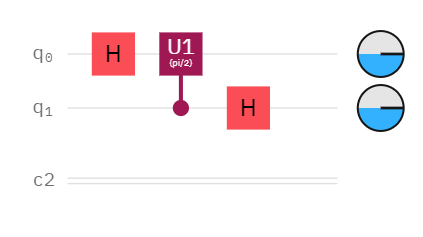

Nous aurons besoin de la porte quantique *cp*. Commençons par implémenter le circuit quantique *circ_cp* suivant :

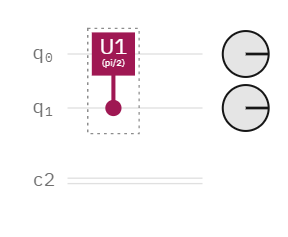

## Récemment, la méthode "CU1" a été renommé en "CP". En fonction de votre version de Qiskit, il est possible que "CU1" ne fonctionne plus. Cependant, il suffit simplement de la remplacer par l'opération "CP"

Pour faire simple, CU1 signifie "Controlled Unitary" sur 1 axe. CP signifie "Controlled Phase", faisant référence à une rotation autour de l'axe Z de la sphère de Bloch controlée par un qubit (de manière analogue à la porte CNOT/CX, faisant référence à la porte NOT/X contrôlée par un qubit).

Autre chose: Comme mentionné à l'oral durant la séance précédente, la fonction *circuit.u1(angle_z, qubit)* a été dépréciée et remplacée par la fonction plus générale *circuit.u(angle_x, angle_y, angle_z, qubit)*. Si on cherche par exemple à appliquer une rotation de phase, et donc une rotation autour de l'axe z, il faut donc remplacer *circuit.u1(angle_z, qubit)* par *circuit.u(0, 0, angle_z, qubit)* (et procéder de manière analogue pour les rotations autour des autres axes)

La fonction *circuit.p(angle, qubit)* (abbréviation de "circuit.phase") devrait fonctionner également (sauf si dépréciée également)

### Dans la suite de ce notebook, préférez l'opération *circuit.cp* à l'opération *circuit.cu1*

In [11]:
from math import pi

circ_cp = QuantumCircuit(2)
q = circ_cp.qubits

circ_cp.cp(pi/2, q[1], q[0])

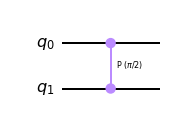

In [12]:
circ_cp.draw(output='mpl')

L'ordre des paramètres de la méthode *cp* est le suivant :

- l'angle ;
- le qubit de contrôle ;
- le qubit cible.

**1) Implémentez la transformée de Fourier quantique pour un registre quantique de dimension 2 dans un circuit quantique nommé** *circ2*.

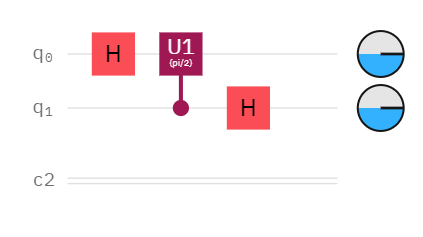

In [ ]:
circ2 = 

In [ ]:
circ2.draw(output='mpl')

**2) Définissez une méthode** *QFT2* **permettant d'appliquer une transformée de Fourier quantique sur un registre quantique de dimension 2 ayant en entrée :**

- un circuit quantique ; 
- le registre quantique de dimension 2 sur lequel appliqué la transformée de Fourier quantique.

In [ ]:
def QFT2(circuit, registre):
    
    return circuit
    

In [ ]:
q2 = QuantumRegister(2)
QFT2(QuantumCircuit(q2), q2).draw(output='mpl')

**2) Définissez une méthode** *QFT3* **permettant d'appliquer une transformée de Fourier quantique sur un registre quantique de dimension 3 ayant en entrée :**

- un circuit quantique ; 
- le registre quantique de dimension 3 sur lequel appliqué la transformée de Fourier quantique.

Le circuit quantique associé est :

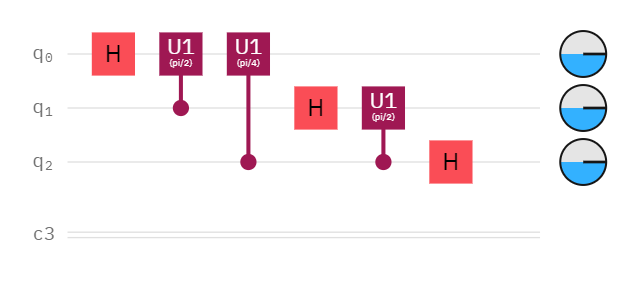

In [ ]:
def QFT3(circuit, registre):
    
    return circuit

In [ ]:
q3 = QuantumRegister(3)
QFT3(QuantumCircuit(q3), q3).draw(output='mpl')

**3) Faites de même pour une transformée de Fourier quantique appliquée à un registre quantique de dimension 4 :**
*nb: les pointillés autour de la porte n'ont pas de signification particulière*

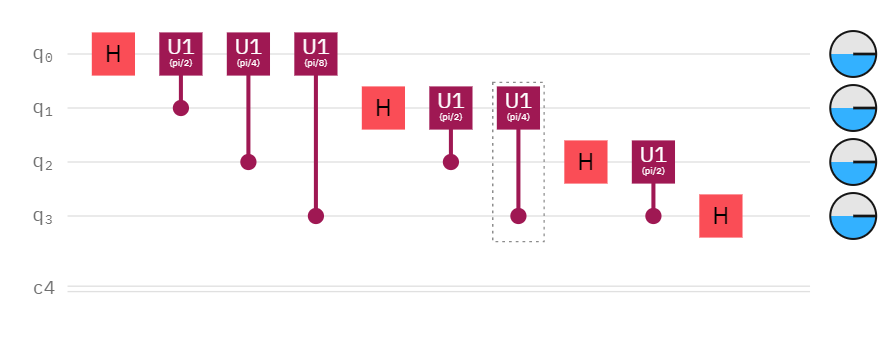

In [ ]:
def QFT4(circuit, registre):
    
    return circuit
    

In [ ]:
q4 = QuantumRegister(4)
QFT4(QuantumCircuit(q4), q4).draw(output='mpl')

### Bonus

Nous allons tenter maintenant de définir une méthode *QFT* capable d'appliquer une transformée de Fourier quantique quelque soit la taille du registre quantique. 

Pour comprendre la récurrence qui nous permettra de définir cette méthode *QFT*, nous aurons besoin de la méthode *R* suivante :

In [10]:
def R(k, circuit, qubit_controle, qubit_cible):    
    circuit.cp(pi/2**k, qubit_controle, qubit_cible)
    return circuit

**Réécrivez les méthodes** *QFT3* et *QFT4* **à l'aide de la méthode** *R* **:**

In [ ]:
def QFT3(circuit, registre):
   
    return circuit
    

In [ ]:
q3 = QuantumRegister(3)
QFT3(QuantumCircuit(q3), q3).draw(output='mpl')

In [ ]:
def QFT4(circuit, registre):
    
    return circuit
    

In [ ]:
q4 = QuantumRegister(4)
QFT4(QuantumCircuit(q4), q4).draw(output='mpl')

Voyez-vous la récurrence ? Elle est liée :

- au qubit cible ;
- à la différence entre les indices du qubit de contrôle et du qubit cible.

**Définissez la méthode** *QFT* **qui applique la transformée de Fourier quantique pour un registre quantique de n'importe quelle dimension.**

In [ ]:
def QFT(circuit, registre):
    
    return circuit
        
    

In [ ]:
q2 = QuantumRegister(2)
QFT(QuantumCircuit(q2), q2).draw(output='mpl')

In [ ]:
q3 = QuantumRegister(3)
QFT(QuantumCircuit(q3), q3).draw(output='mpl')

In [ ]:
q4 = QuantumRegister(4)
QFT(QuantumCircuit(q4), q4).draw(output='mpl')

Nous avons presque fini. Pour régler le problème de convention, il faut utiliser la méthode *do_swaps* sur le registre quantique en entier après avoir appliqué la transformée de Fourier quantique.

**Redéfinissez votre méthode** *QFT* **en rajoutant une variable optionnelle** *to_swap* **telle que :**

- elle ait pour valeur par défaut *True* ;
- la méthode *do_swaps* ne soit utilisée que si la valeur de *to_swap* est *True*.

In [ ]:
def QFT(circuit, registre, to_swap=True):
    
    return circuit
    

In [ ]:
q2 = QuantumRegister(2)
QFT(QuantumCircuit(q2), q2).draw(output='mpl')

In [ ]:
q3 = QuantumRegister(3)
QFT(QuantumCircuit(q3), q3).draw(output='mpl')

In [ ]:
q4 = QuantumRegister(4)
QFT(QuantumCircuit(q4), q4).draw(output='mpl')

In [ ]:
q4 = QuantumRegister(4)
QFT(QuantumCircuit(q4), q4, False).draw(output='mpl')

## Transformée de Fourier quantique inverse

Dans cette partie, nous tenterons d'implémenter l'opération inverse à la méthode *QFT* que nous nommerons *inverse_QFT*. Nous décomposerons cet exercice en plusieurs étapes :

- nous commencerons par voir (ou revoir pour certains) la méthode *QFT* qui permet de généraliser la transformée de Fourier quantique pour n'importe quel registre quantique ;
- puis nous chercherons les portes inverses aux portes qui composent la méthode *QFT* ;
- enfin nous implémenterons *inverse_QFT* en tant qu'inverse de la méthode *QFT* ;
- finalement nous testerons la méthode *inverse_QFT* nouvellement implémentée grâce au circuit quantique de Bell.

### Lecture de la méthode *QFT*

La méthode *QFT* comme proposée précédemment nécessite trois autres méthodes :

- la méthode *porte_SWAP* ;
- la méthode *do_swaps* ;
- la méthode *R*.

La méthode *porte_SWAP* sert, on se rappelle, à échanger les états de deux qubits. La voici :

In [ ]:
from qiskit.circuit import Qubit

def porte_SWAP(circuit, qubits):
    
    if type(circuit) == QuantumCircuit:
        
        if len(qubits) == 2:
            
            if type(qubits[0]) == Qubit and type(qubits[1]) == Qubit:
                circuit.cx(qubits[0], qubits[1])
                circuit.cx(qubits[1], qubits[0])    
                circuit.cx(qubits[0], qubits[1])
            
            elif type(qubits[0]) == int and type(qubits[1]) == int:
                q = circuit.qubits
                circuit.cx(q[qubits[0]], q[qubits[1]])
                circuit.cx(q[qubits[1]], q[qubits[0]])    
                circuit.cx(q[qubits[0]], q[qubits[1]])
                
    return circuit

La méthode *do_swaps* va employer la méthode *porte_SWAP* pour échanger deux par deux les états des qubits d'un registre au complet telle que :

- l'état du premier qubit soit échangé avec celui du dernier qubit ;
- l'état du second qubit soit échangé avec celui de l'avant-dernier qubit ;
- etc. ;

et telle que si le nombre de qubits est impair, l'état du qubit central soit inchangé.

Ceci permettra de rester dans la convention *LSBF* même après action de la méthode *QFT* :

In [1]:
def do_swaps(circuit, registre):
    for i in range(len(registre) // 2) :
        circuit = porte_SWAP(circuit, [registre[i], registre[len(registre) - 1 - i]])
    return circuit

Finalement, la méthode *R* était utile pour constater la récurrence qui pouvait apparaître lors de l'implémentation de *QFT* :

In [2]:
from math import pi

def R(k, circuit, qubit_controle, qubit_cible):    
    circuit.cp(pi/2**k, qubit_controle, qubit_cible)
    return circuit

Cela nous donne enfin la méthode *QFT* avec la variable optionnelle *to_swap* qui permet d'appliquer ou non la méthode *do_swaps* :

In [3]:
def QFT(circuit, registre, to_swap=True):
    
    for i in range(len(registre)):
        circuit.h(registre[i])
        
        for distance in range(len(registre) - i - 1):
            distance = distance + 1
            circuit = R(distance, circuit, registre[i + distance], registre[i])
            
    if to_swap:
        circuit = do_swaps(circuit, registre)
            
    return circuit

### Les portes inverses

Pour inverser une méthode composée d'instructions, il s'agit de :

- trouver les instructions inverses à celles qui composent la méthode ;
- inverser l'ordre des instructions en les ayant remplacé par les instructions inverses.

Pour ceux familiers avec l'algèbre linéaire, si nous avons la méthode représentable par une matrice $M = A \cdot B$, il s'agit de trouver la méthode inverse associée à $M^{-1} = \left(A \cdot B\right)^{-1} = B^{-1} \cdot A^{-1}.$

*Remarque : Une méthode ou une instruction $\mathcal{K}_1$ est l'inverse d'une autre méthode ou instruction $\mathcal{K}_2$ si et seulement si les sorties sont identiques aux entrées après l'action consécutive des méthodes $\mathcal{K}_1$ et $\mathcal{K}_2$, et ce pour toutes entrées possibles.*

Lorsque je dirais *Démontrez que c'est l'inverse de...*, il faut bien sûr comprendre que vous ne pourrez pas tester cette propriété pour toutes entrées possibles (au risque de vous prendre un temps infini...). Utilisez un seul cas qui vous semble parlant.

**1) Démontrez que la porte Hadamard est son propre inverse sur le circuit suivant.**

In [4]:
from qiskit.circuit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.providers.basic_provider import BasicProvider
backend = BasicProvider().get_backend("basic_simulator")

q_test = QuantumRegister(1)
c_test = ClassicalRegister(1)
circ_test = QuantumCircuit(q_test, c_test)

circ_test.x(q_test)

#Faites agir les portes ici


#N'oubliez pas la mesure !

job_test = backend.run(circ_test, shots=1000)

In [ ]:
circ_test.draw(output='mpl')

In [ ]:
res_test = job_test.result().get_counts()
print(res_test)

In [ ]:
assert res_test['1'] == 1000

**2) Démontrez que la méthode** *do_swaps* **est son propre inverse sur le circuit suivant.**

In [ ]:
q_test = QuantumRegister(4)
c_test = ClassicalRegister(4)
circ_test = QuantumCircuit(q_test, c_test)

circ_test.x([q_test[0], q_test[2]])

#Faites agir les portes ici


#N'oubliez pas la mesure !

job_test = backend.run(circ_test, shots=1000)

In [ ]:
circ_test.draw(output='mpl')

In [ ]:
res_test = job_test.result().get_counts()
print(res_test)

In [ ]:
assert res_test['0101'] == 1000

Nous proposons maintenant la méthode suivante *inverse_R* qui sera utile pour l'implémentation de *inverse_QFT* :

In [ ]:
def inverse_R(k, circuit, qubit_controle, qubit_cible):
    circuit.cp(-pi/2**k, qubit_controle, qubit_cible)
    return circuit

**3) Démontrez que la méthode** *inverse_R* **est l'inverse de la méthode** *R* **sur le circuit suivant.**

In [ ]:
q_test = QuantumRegister(2)
c_test = ClassicalRegister(2)
circ_test = QuantumCircuit(q_test, c_test)

circ_test.x(q_test)

k = 1

#Faites agir les portes ici


#N'oubliez pas la mesure !

job_test = backend.run(circ_test, shots=1000)

In [ ]:
circ_test.draw(output='mpl')

In [ ]:
res_test = job_test.result().get_counts()
print(res_test)

In [ ]:
assert res_test['11'] == 1000

Je vous partage une dernière astuce qui vous sera utile : normalement vous savez déjà comment vous "baladez" avec un indice dans une liste en suivant l'ordre de ces éléments :

In [ ]:
n = 5
for i in range(n):
    print(i)

Vous aurez besoin de le faire en suivant l'ordre exactement inverse des éléments d'une liste :

In [ ]:
for i in range(n):
    print(n - i - 1)

### Implémentation de *inverse_QFT*

Nous sommes maintenant capable d'inverser les éléments qui composent la méthode *QFT*.

Pour finalement implémenter *inverse_QFT*, il s'agit maintenant de remplacer les éléments de *QFT* par leur inverse respective tout en faisant attention à inverser leur ordre d'apparition. Autrement dit :

In [ ]:
def dummy():
    instruction1
    instruction2
    instruction3

Son inverse est :

In [ ]:
def inverse_dummy():
    inverse_instruction3
    inverse_instruction2
    inverse_instruction1

**Implémentez** *inverse_QFT.*

In [ ]:
def inverse_QFT(circuit, registre, to_swap=True):
    

### Vérification de la méthode inverse_QFT

Nous allons maintenant vérifier que la méthode *inverse_QFT* nouvellement implémentée soit vraiment la transformée de Fourier quantique inverse. Nous le répétons : il suffit de faire les opérations *QFT* et *inverse_QFT* de suite, et si l'action combinée de ces opérations est une non-action (s'il ne se passe rien), nous aurons bien montrer que *inverse_QFT* est l'inverse de *QFT*.

Le circuit de Bell nous permettra de faire ce test.

**1) Implémentez le circuit quantique de Bell.**

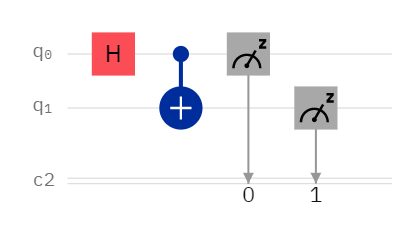

In [ ]:
circ_test =



job_test = backend.run(circ_test, shots=1000)

In [ ]:
circ_test.draw(output='mpl')

In [ ]:
print(job_test.result().get_counts())

**2) Faites de même en ayant rajouté avant mesures la transformée de Fourier quantique et votre méthode implémentée** *inverse_QFT.*

In [ ]:
circ_test = 


job_test = backend.run(circ_test, shots=1000)

In [ ]:
circ_test.draw(output='mpl')

In [ ]:
print(job_test.result().get_counts())